# Tutorial 2 - RNN Time Series

In this notebook, we will predict the weather temperature. 

In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error


# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Read the Dataset

In [2]:
import pandas as pd

chase = pd.read_csv('jpm.csv')

chase.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,11/28/2022,136.070007,136.710007,134.190002,134.350006,132.326385,9906900
1,11/29/2022,134.660004,136.639999,134.410004,136.559998,134.503098,7925300
2,11/30/2022,136.089996,138.179993,133.190002,138.179993,136.098679,14761200
3,12/1/2022,138.179993,138.660004,135.429993,136.240005,134.187912,8858500
4,12/2/2022,134.490005,135.350006,133.339996,135.160004,133.124191,8931900


In [3]:
chase

,Date,Open,High,Low,Close,Adj Close,Volume
0,11/28/2022,136.070007,136.710007,134.190002,134.350006,132.326385,9906900
1,11/29/2022,134.660004,136.639999,134.410004,136.559998,134.503098,7925300
2,11/30/2022,136.089996,138.179993,133.190002,138.179993,136.098679,14761200
3,12/1/2022,138.179993,138.660004,135.429993,136.240005,134.187912,8858500
4,12/2/2022,134.490005,135.350006,133.339996,135.160004,133.124191,8931900
...,...,...,...,...,...,...,...
95,4/17/2023,139.949997,140.059998,137.660004,139.830002,139.830002,16050500
96,4/18/2023,140.270004,141.779999,139.029999,141.399994,141.399994,13760100
97,4/19/2023,141.229996,141.500000,140.399994,141.220001,141.220001,9158100
98,4/20/2023,139.910004,141.429993,139.839996,140.809998,140.809998,10586200


In [4]:
#Drop the columns we don't need

chase = chase.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)

In [5]:
chase

,Date,Close
0,11/28/2022,134.350006
1,11/29/2022,136.559998
2,11/30/2022,138.179993
3,12/1/2022,136.240005
4,12/2/2022,135.160004
...,...,...
95,4/17/2023,139.830002
96,4/18/2023,141.399994
97,4/19/2023,141.220001
98,4/20/2023,140.809998


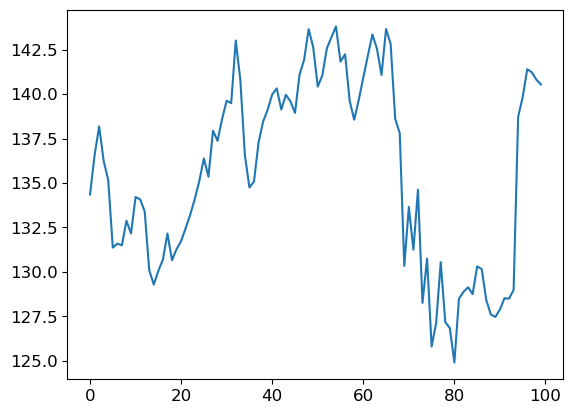

In [6]:
#Plot temp

plt.plot(chase['Close'])
plt.show()

# Data Cleanup

Removal of null values

In [7]:

chase = chase.dropna().reset_index(drop=True)

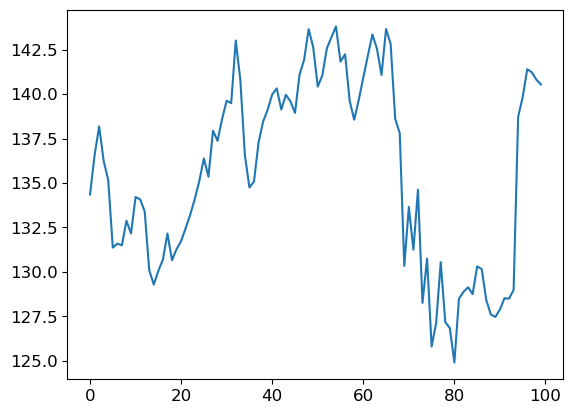

In [8]:
plt.plot(chase['Close'])
plt.show()

## RESHAPE the data set!

In [9]:
chase.shape

(100, 2)

In [10]:


chase.shape[0]/10

10.0

In [11]:
chase.groupby(['Date']).count()

,Close
Date,
1/10/2023,1
1/11/2023,1
1/12/2023,1
1/13/2023,1
1/17/2023,1
...,...
4/21/2023,1
4/3/2023,1
4/4/2023,1


In [12]:
# Find the reading count for each day

data = np.array(chase['Close']).reshape(10,10)

data

array([[134.350006, 136.559998, 138.179993, 136.240005, 135.160004,
        131.369995, 131.589996, 131.5     , 132.880005, 132.160004],
       [134.210007, 134.080002, 133.410004, 130.100006, 129.289993,
        130.059998, 130.690002, 132.160004, 130.660004, 131.279999],
       [131.740005, 132.460007, 133.220001, 134.100006, 135.119995,
        136.380005, 135.350006, 137.940002, 137.369995, 138.600006],
       [139.630005, 139.490005, 143.009995, 140.800003, 136.570007,
        134.75    , 135.080002, 137.270004, 138.449997, 139.119995],
       [139.979996, 140.320007, 139.130005, 139.960007, 139.589996,
        138.940002, 141.089996, 141.919998, 143.649994, 142.639999],
       [140.419998, 141.039993, 142.570007, 143.199997, 143.800003,
        141.820007, 142.240005, 139.630005, 138.559998, 139.669998],
       [140.929993, 142.160004, 143.350006, 142.550003, 141.070007,
        143.660004, 142.820007, 138.619995, 137.800003, 130.339996],
       [133.649994, 131.25    , 134.61999

In [13]:
# dataframe

data_df=pd.DataFrame(data,columns=np.arange(0,10,1))

data_df

,0,1,2,3,4,5,6,7,8,9
0,134.350006,136.559998,138.179993,136.240005,135.160004,131.369995,131.589996,131.500000,132.880005,132.160004
1,134.210007,134.080002,133.410004,130.100006,129.289993,130.059998,130.690002,132.160004,130.660004,131.279999
2,131.740005,132.460007,133.220001,134.100006,135.119995,136.380005,135.350006,137.940002,137.369995,138.600006
3,139.630005,139.490005,143.009995,140.800003,136.570007,134.750000,135.080002,137.270004,138.449997,139.119995
4,139.979996,140.320007,139.130005,139.960007,139.589996,138.940002,141.089996,141.919998,143.649994,142.639999
5,140.419998,141.039993,142.570007,143.199997,143.800003,141.820007,142.240005,139.630005,138.559998,139.669998
6,140.929993,142.160004,143.350006,142.550003,141.070007,143.660004,142.820007,138.619995,137.800003,130.339996
7,133.649994,131.250000,134.619995,128.259995,130.750000,125.809998,127.139999,130.550003,127.180000,126.839996
8,124.910004,128.490005,128.880005,129.139999,128.750000,130.309998,130.160004,128.419998,127.610001,127.470001
9,127.889999,128.520004,128.500000,128.990005,138.729996,139.830002,141.399994,141.220001,140.809998,140.539993


# Reshape for Standardizing Data

In [14]:
# Let's create a single sequence (i.e., feature) for standardization

data_1feature = np.array(data_df).ravel().reshape(-1,1)

data_1feature.shape

(100, 1)

In [15]:
data_1feature

array([[134.350006],
       [136.559998],
       [138.179993],
       [136.240005],
       [135.160004],
       [131.369995],
       [131.589996],
       [131.5     ],
       [132.880005],
       [132.160004],
       [134.210007],
       [134.080002],
       [133.410004],
       [130.100006],
       [129.289993],
       [130.059998],
       [130.690002],
       [132.160004],
       [130.660004],
       [131.279999],
       [131.740005],
       [132.460007],
       [133.220001],
       [134.100006],
       [135.119995],
       [136.380005],
       [135.350006],
       [137.940002],
       [137.369995],
       [138.600006],
       [139.630005],
       [139.490005],
       [143.009995],
       [140.800003],
       [136.570007],
       [134.75    ],
       [135.080002],
       [137.270004],
       [138.449997],
       [139.119995],
       [139.979996],
       [140.320007],
       [139.130005],
       [139.960007],
       [139.589996],
       [138.940002],
       [141.089996],
       [141.9

## Standardize the values

In [16]:
# Next, standardize

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_std = scaler.fit_transform(data_1feature)

## Reshape the data 

In [17]:
data_reshaped = data_std.reshape(10,10)

data_reshaped.shape

(10, 10)

In [18]:
#Pandas version of the reshaped data

pd.DataFrame(data_reshaped)

,0,1,2,3,4,5,6,7,8,9
0,-0.222439,0.196043,0.502803,0.135449,-0.069059,-0.786731,-0.745072,-0.762113,-0.500797,-0.637135
1,-0.248949,-0.273567,-0.400437,-1.027215,-1.180598,-1.034790,-0.915494,-0.637135,-0.921174,-0.803772
2,-0.716666,-0.580327,-0.436416,-0.269779,-0.076635,0.161960,-0.033080,0.457359,0.349423,0.582337
3,0.777376,0.750866,1.417408,0.998926,0.197938,-0.146697,-0.084208,0.330489,0.553931,0.680801
4,0.843650,0.908034,0.682697,0.839865,0.769800,0.646718,1.053838,1.211007,1.538597,1.347345
5,0.926968,1.044370,1.334092,1.453386,1.567003,1.192073,1.271603,0.777376,0.574761,0.784949
6,1.023540,1.256454,1.481792,1.330304,1.050053,1.540493,1.381432,0.586122,0.430849,-0.981770
7,-0.354993,-0.809453,-0.171314,-1.375637,-0.904132,-1.839566,-1.587718,-0.942004,-1.580144,-1.644527
8,-2.009988,-1.332083,-1.258233,-1.209000,-1.282850,-0.987451,-1.015853,-1.345339,-1.498719,-1.525230
9,-1.445699,-1.326402,-1.330190,-1.237403,0.606951,0.815247,1.112539,1.078456,1.000818,0.949691


# Split the Data

**In certain cases, we cannot use a random split. For example, if we are trying to predict the stock market, we cannot use a random split. We need to use a chronological split.**

BUT, keep in mind if we have something like hourly readings of dayly temperature, we can use a random split on days, but the sequence of the temperature within the day is important to remain sequential.

In this case, we are using a random spli because each day as an independent sample.

In [24]:
from sklearn.model_selection import train_test_split

#train, test = train_test_split(data_reshaped, test_size=0.3)

# if we neede to maintain the ordering of the data, we can use the following code to split the data
split_point = int(len(data_reshaped)*0.7)
train, test = data_reshaped[:split_point], data_reshaped[split_point:]

In [25]:
train.shape

(7, 10)

In [26]:
train

array([[-0.22243899,  0.1960428 ,  0.50280336,  0.13544925, -0.06905861,
        -0.78673077, -0.74507161, -0.76211315, -0.50079685, -0.63713548],
       [-0.24894905, -0.27356666, -0.40043679, -1.02721456, -1.18059778,
        -1.03479043, -0.91549353, -0.63713548, -0.92117392, -0.80377231],
       [-0.71666606, -0.58032723, -0.43641556, -0.26977873, -0.07663467,
         0.16195951, -0.03308003,  0.45735892,  0.34942298,  0.58233659],
       [ 0.77737612,  0.75086587,  1.41740751,  0.99892573,  0.19793809,
        -0.14669654, -0.08420771,  0.33048879,  0.55393104,  0.68080116],
       [ 0.84365005,  0.90803418,  0.68269664,  0.83986496,  0.76980006,
         0.64671787,  1.0538385 ,  1.21100681,  1.53859705,  1.34734545],
       [ 0.92696837,  1.04436998,  1.33409184,  1.45338609,  1.5670026 ,
         1.19207262,  1.271603  ,  0.77737612,  0.57476071,  0.78494916],
       [ 1.0235405 ,  1.2564541 ,  1.48179164,  1.3303039 ,  1.0500534 ,
         1.54049253,  1.38143158,  0.58612168

In [27]:
test.shape

(3, 10)

# Create Input and Target values

The first 23 hours will be input to predict the 24th hour reading (i.e., target)

In [28]:


train_inputs = train[:,:9]


pd.DataFrame(train_inputs, columns=np.arange(0,9,1))

,0,1,2,3,4,5,6,7,8
0,-0.222439,0.196043,0.502803,0.135449,-0.069059,-0.786731,-0.745072,-0.762113,-0.500797
1,-0.248949,-0.273567,-0.400437,-1.027215,-1.180598,-1.034790,-0.915494,-0.637135,-0.921174
2,-0.716666,-0.580327,-0.436416,-0.269779,-0.076635,0.161960,-0.033080,0.457359,0.349423
3,0.777376,0.750866,1.417408,0.998926,0.197938,-0.146697,-0.084208,0.330489,0.553931
4,0.843650,0.908034,0.682697,0.839865,0.769800,0.646718,1.053838,1.211007,1.538597
5,0.926968,1.044370,1.334092,1.453386,1.567003,1.192073,1.271603,0.777376,0.574761
6,1.023540,1.256454,1.481792,1.330304,1.050053,1.540493,1.381432,0.586122,0.430849


## Add one more dimension to make it ready for RNNs

See here for more details: https://keras.io/layers/recurrent/, and https://shiva-verma.medium.com/understanding-input-and-output-shape-in-lstm-keras-c501ee95c65e


In [29]:
train_inputs

array([[-0.22243899,  0.1960428 ,  0.50280336,  0.13544925, -0.06905861,
        -0.78673077, -0.74507161, -0.76211315, -0.50079685],
       [-0.24894905, -0.27356666, -0.40043679, -1.02721456, -1.18059778,
        -1.03479043, -0.91549353, -0.63713548, -0.92117392],
       [-0.71666606, -0.58032723, -0.43641556, -0.26977873, -0.07663467,
         0.16195951, -0.03308003,  0.45735892,  0.34942298],
       [ 0.77737612,  0.75086587,  1.41740751,  0.99892573,  0.19793809,
        -0.14669654, -0.08420771,  0.33048879,  0.55393104],
       [ 0.84365005,  0.90803418,  0.68269664,  0.83986496,  0.76980006,
         0.64671787,  1.0538385 ,  1.21100681,  1.53859705],
       [ 0.92696837,  1.04436998,  1.33409184,  1.45338609,  1.5670026 ,
         1.19207262,  1.271603  ,  0.77737612,  0.57476071],
       [ 1.0235405 ,  1.2564541 ,  1.48179164,  1.3303039 ,  1.0500534 ,
         1.54049253,  1.38143158,  0.58612168,  0.43084885]])

In [30]:
train_inputs.shape 

(7, 9)

In [31]:
#Create an additional dimension for train

train_x = train_inputs[:,:,np.newaxis]

train_x.shape 

(7, 9, 1)

In [32]:
train_x

array([[[-0.22243899],
        [ 0.1960428 ],
        [ 0.50280336],
        [ 0.13544925],
        [-0.06905861],
        [-0.78673077],
        [-0.74507161],
        [-0.76211315],
        [-0.50079685]],

       [[-0.24894905],
        [-0.27356666],
        [-0.40043679],
        [-1.02721456],
        [-1.18059778],
        [-1.03479043],
        [-0.91549353],
        [-0.63713548],
        [-0.92117392]],

       [[-0.71666606],
        [-0.58032723],
        [-0.43641556],
        [-0.26977873],
        [-0.07663467],
        [ 0.16195951],
        [-0.03308003],
        [ 0.45735892],
        [ 0.34942298]],

       [[ 0.77737612],
        [ 0.75086587],
        [ 1.41740751],
        [ 0.99892573],
        [ 0.19793809],
        [-0.14669654],
        [-0.08420771],
        [ 0.33048879],
        [ 0.55393104]],

       [[ 0.84365005],
        [ 0.90803418],
        [ 0.68269664],
        [ 0.83986496],
        [ 0.76980006],
        [ 0.64671787],
        [ 1.0538385 ],
   

## Set the target

In [33]:
# The last column (9) is TARGET

train_target = train[:,-1]


pd.DataFrame(train_target, columns=['9'])

,9
0,-0.637135
1,-0.803772
2,0.582337
3,0.680801
4,1.347345
5,0.784949
6,-0.981770


## Repeat for TEST

In [34]:
test.shape

(3, 10)

In [35]:


test_inputs = test[:,:9]

In [36]:
#Create an additional dimension for test

test_x = test_inputs[:,:,np.newaxis]

test_x.shape 

(3, 9, 1)

In [37]:
# The last column (9) is TARGET

test_target = test[:,-1]


pd.DataFrame(test_target, columns=['9'])

,9
0,-1.644527
1,-1.525230
2,0.949691


In [38]:
performance=pd.DataFrame({"model":[], "MSE":[]})

# A normal (cross-sectional) NN

This model assumes that the data is NOT a time-series data set. It treats the data as cross-sectional and the columns being independent of each other.

In [39]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[9, 1]),
    keras.layers.Dense(23, activation='relu'),
    keras.layers.Dense(1, activation=None)
    
])

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 861ms/step - loss: 0.9519
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 0.9192
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 0.8882
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 0.8590
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 0.8315
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 0.8055
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 0.7811
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 0.7583
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 0.7365
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 0.7158
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - loss: 0.6962
Epoch 12/100
1/1 [==============================] - 0s 8ms/step - loss: 0.6778
Epoch 13/100
1/1 [==============================] - 0s 8ms/

### Predictions

In [40]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 0s 148ms/step


In [41]:
# Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [42]:
comparison

,actual,predicted
0,126.839996,130.610382
1,127.470001,133.465714
2,140.539993,147.329498


In [43]:
MSE=mean_squared_error(comparison['actual'], comparison['predicted'])

In [44]:
performance = pd.concat([performance,pd.DataFrame({'model': 'Normal NN', 'MSE':MSE}, index=[0])])
performance

,model,MSE
0,Normal NN,32.087254


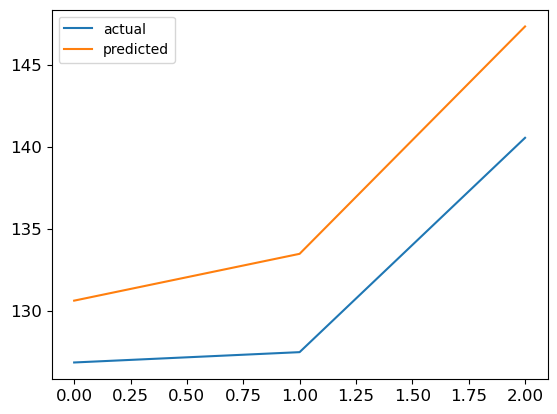

In [45]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# Simple RNN

Simplest recurrent neural network

In [46]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(32, activation='relu', input_shape=[9, 1]),
    keras.layers.Dense(1, activation=None)
])

In [47]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 2s 2s/step - loss: 0.6814
Epoch 2/30
1/1 [==============================] - 0s 9ms/step - loss: 0.6517
Epoch 3/30
1/1 [==============================] - 0s 8ms/step - loss: 0.6235
Epoch 4/30
1/1 [==============================] - 0s 8ms/step - loss: 0.5975
Epoch 5/30
1/1 [==============================] - 0s 10ms/step - loss: 0.5736
Epoch 6/30
1/1 [==============================] - 0s 8ms/step - loss: 0.5487
Epoch 7/30
1/1 [==============================] - 0s 10ms/step - loss: 0.5249
Epoch 8/30
1/1 [==============================] - 0s 8ms/step - loss: 0.5009
Epoch 9/30
1/1 [==============================] - 0s 7ms/step - loss: 0.4800
Epoch 10/30
1/1 [==============================] - 0s 9ms/step - loss: 0.4582
Epoch 11/30
1/1 [==============================] - 0s 8ms/step - loss: 0.4371
Epoch 12/30
1/1 [==============================] - 0s 9ms/step - loss: 0.4174
Epoch 13/30
1/1 [==============================] - 0s 8ms/step - loss: 0

### Predictions

In [48]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 0s 227ms/step


In [49]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [50]:
comparison

,actual,predicted
0,126.839996,129.927353
1,127.470001,130.012695
2,140.539993,138.276154


In [51]:
MSE=mean_squared_error(comparison['actual'], comparison['predicted'])

In [52]:
performance = pd.concat([performance,pd.DataFrame({'model': 'simple RNN', 'MSE':MSE}, index=[0])])
performance

,model,MSE
0,Normal NN,32.087254
0,simple RNN,7.040679


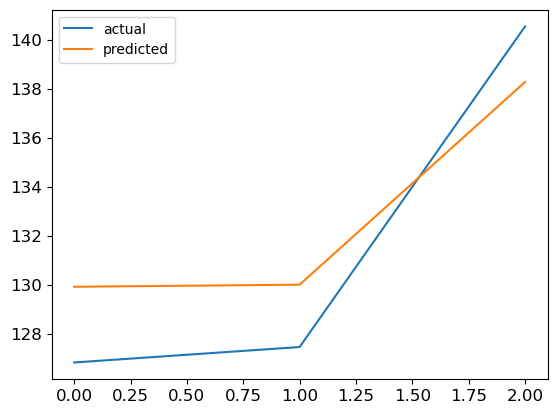

In [53]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

## Simple RNN with more layers

**Be careful: when stacking RNN layers, you have to set "return_sequences" to True. This enables the layer to send a "sequence" of values to the next layer -- jut like how it uses a sequence of values for training. However, if the output of RNN is sent to a DENSE layer, then a single value should be sent. That's why there is no "return sequences" right before DENSE layers.**

In [54]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(32, activation='relu', return_sequences=True, input_shape=[9, 1]),
    keras.layers.SimpleRNN(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [55]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="MSE", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 2s 2s/step - loss: 0.8141
Epoch 2/30
1/1 [==============================] - 0s 10ms/step - loss: 0.7414
Epoch 3/30
1/1 [==============================] - 0s 10ms/step - loss: 0.6776
Epoch 4/30
1/1 [==============================] - 0s 11ms/step - loss: 0.6135
Epoch 5/30
1/1 [==============================] - 0s 9ms/step - loss: 0.5536
Epoch 6/30
1/1 [==============================] - 0s 11ms/step - loss: 0.5033
Epoch 7/30
1/1 [==============================] - 0s 9ms/step - loss: 0.4628
Epoch 8/30
1/1 [==============================] - 0s 9ms/step - loss: 0.4295
Epoch 9/30
1/1 [==============================] - 0s 9ms/step - loss: 0.4024
Epoch 10/30
1/1 [==============================] - 0s 11ms/step - loss: 0.3799
Epoch 11/30
1/1 [==============================] - 0s 10ms/step - loss: 0.3572
Epoch 12/30
1/1 [==============================] - 0s 11ms/step - loss: 0.3367
Epoch 13/30
1/1 [==============================] - 0s 11ms/step - l

### Predictions

In [56]:
#Predict:
y_pred = model.predict(test_x)


1/1 [==============================] - 0s 315ms/step


In [57]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [58]:
comparison

,actual,predicted
0,126.839996,131.302277
1,127.470001,132.364471
2,140.539993,141.592163


In [59]:
MSE=mean_squared_error(comparison['actual'], comparison['predicted'])

In [60]:
performance = pd.concat([performance,pd.DataFrame({'model': 'simple RNN with more layers', 'MSE':MSE}, index=[0])])
performance

,model,MSE
0,Normal NN,32.087254
0,simple RNN,7.040679
0,simple RNN with more layers,14.991617


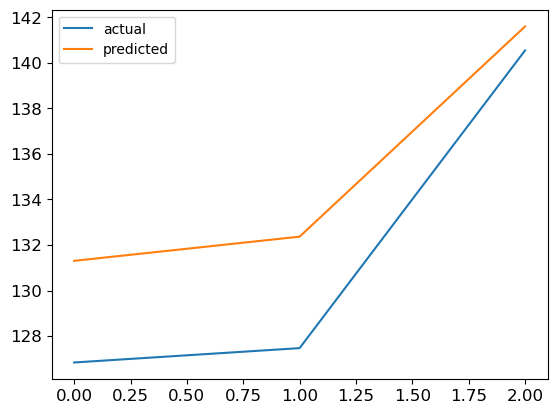

In [61]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# LSTM with one layer

In [62]:
model = keras.models.Sequential([
    keras.layers.LSTM(32, activation='relu', input_shape=[9, 1]),
    keras.layers.Dense(1, activation=None)
])

In [63]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 2s 2s/step - loss: 0.7264
Epoch 2/30
1/1 [==============================] - 0s 11ms/step - loss: 0.7194
Epoch 3/30
1/1 [==============================] - 0s 12ms/step - loss: 0.7125
Epoch 4/30
1/1 [==============================] - 0s 12ms/step - loss: 0.7058
Epoch 5/30
1/1 [==============================] - 0s 11ms/step - loss: 0.6992
Epoch 6/30
1/1 [==============================] - 0s 11ms/step - loss: 0.6927
Epoch 7/30
1/1 [==============================] - 0s 10ms/step - loss: 0.6864
Epoch 8/30
1/1 [==============================] - 0s 11ms/step - loss: 0.6802
Epoch 9/30
1/1 [==============================] - 0s 12ms/step - loss: 0.6741
Epoch 10/30
1/1 [==============================] - 0s 10ms/step - loss: 0.6682
Epoch 11/30
1/1 [==============================] - 0s 11ms/step - loss: 0.6624
Epoch 12/30
1/1 [==============================] - 0s 10ms/step - loss: 0.6567
Epoch 13/30
1/1 [==============================] - 0s 11ms/step

### Predictions

In [64]:
#Predict:
y_pred = model.predict(test_x)


1/1 [==============================] - 1s 623ms/step


In [65]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [66]:
comparison

,actual,predicted
0,126.839996,133.442368
1,127.470001,133.203506
2,140.539993,137.052795


In [67]:
MSE=mean_squared_error(comparison['actual'], comparison['predicted'])

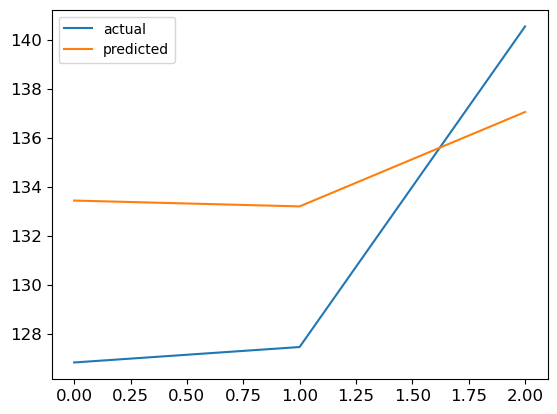

In [68]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# LSTM with more layers

In [69]:
model = keras.models.Sequential([
    keras.layers.LSTM(32, activation='tanh', return_sequences=True, input_shape=[9, 1]),
    keras.layers.LSTM(32, activation='tanh', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [70]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 6s 6s/step - loss: 0.7979
Epoch 2/30
1/1 [==============================] - 0s 14ms/step - loss: 0.7783
Epoch 3/30
1/1 [==============================] - 0s 15ms/step - loss: 0.7603
Epoch 4/30
1/1 [==============================] - 0s 17ms/step - loss: 0.7437
Epoch 5/30
1/1 [==============================] - 0s 16ms/step - loss: 0.7285
Epoch 6/30
1/1 [==============================] - 0s 15ms/step - loss: 0.7147
Epoch 7/30
1/1 [==============================] - 0s 15ms/step - loss: 0.7022
Epoch 8/30
1/1 [==============================] - 0s 15ms/step - loss: 0.6910
Epoch 9/30
1/1 [==============================] - 0s 14ms/step - loss: 0.6811
Epoch 10/30
1/1 [==============================] - 0s 15ms/step - loss: 0.6726
Epoch 11/30
1/1 [==============================] - 0s 15ms/step - loss: 0.6653
Epoch 12/30
1/1 [==============================] - 0s 15ms/step - loss: 0.6593
Epoch 13/30
1/1 [==============================] - 0s 16ms/step

### Predictions

In [71]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 1s 1s/step


In [72]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [73]:
comparison

,actual,predicted
0,126.839996,132.355286
1,127.470001,131.656067
2,140.539993,135.120880


In [74]:
MSE=mean_squared_error(comparison['actual'], comparison['predicted'])

In [75]:
performance = pd.concat([performance,pd.DataFrame({'model': 'LSTM RNN', 'MSE':MSE}, index=[0])])
performance

,model,MSE
0,Normal NN,32.087254
0,simple RNN,7.040679
0,simple RNN with more layers,14.991617
0,LSTM RNN,25.769451


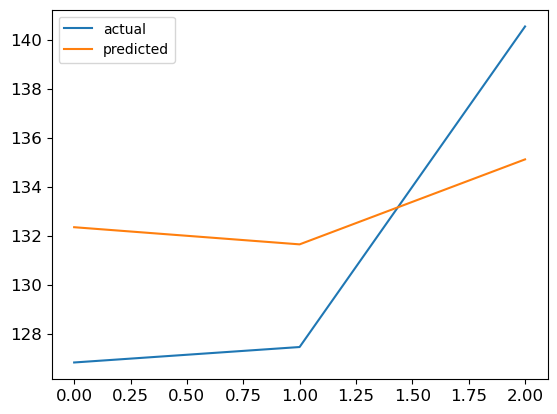

In [76]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# GRU (with more layers)

In [77]:
model = keras.models.Sequential([
    keras.layers.GRU(32, activation='relu', return_sequences=True, input_shape=[9, 1]),
    keras.layers.GRU(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [78]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='RMSprop')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 4s 4s/step - loss: 0.7589
Epoch 2/30
1/1 [==============================] - 0s 14ms/step - loss: 0.7246
Epoch 3/30
1/1 [==============================] - 0s 15ms/step - loss: 0.7050
Epoch 4/30
1/1 [==============================] - 0s 15ms/step - loss: 0.6905
Epoch 5/30
1/1 [==============================] - 0s 13ms/step - loss: 0.6788
Epoch 6/30
1/1 [==============================] - 0s 15ms/step - loss: 0.6686
Epoch 7/30
1/1 [==============================] - 0s 12ms/step - loss: 0.6597
Epoch 8/30
1/1 [==============================] - 0s 13ms/step - loss: 0.6516
Epoch 9/30
1/1 [==============================] - 0s 13ms/step - loss: 0.6441
Epoch 10/30
1/1 [==============================] - 0s 12ms/step - loss: 0.6369
Epoch 11/30
1/1 [==============================] - 0s 14ms/step - loss: 0.6301
Epoch 12/30
1/1 [==============================] - 0s 15ms/step - loss: 0.6235
Epoch 13/30
1/1 [==============================] - 0s 16ms/step

### Predictions

In [79]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 0s 467ms/step


In [80]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [81]:
MSE=mean_squared_error(comparison['actual'], comparison['predicted'])

In [82]:
performance = pd.concat([performance,pd.DataFrame({'model': 'GRU with more layers', 'MSE':MSE}, index=[0])])
performance

,model,MSE
0,Normal NN,32.087254
0,simple RNN,7.040679
0,simple RNN with more layers,14.991617
0,LSTM RNN,25.769451
0,GRU with more layers,27.248037


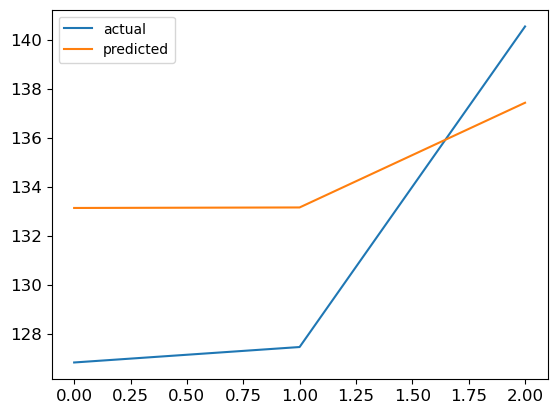

In [83]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# Conv1D

### Last Layer: GRU (you can change it to SimpleRNN or LSTM as well)

In [84]:
model = keras.models.Sequential([
    keras.layers.Conv1D(filters=20, kernel_size=3, strides=1, padding="valid", input_shape=[9, 1]),
    keras.layers.GRU(32, activation='relu', return_sequences=True),
    keras.layers.GRU(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [85]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 5s 5s/step - loss: 0.7530
Epoch 2/30
1/1 [==============================] - 0s 13ms/step - loss: 0.7351
Epoch 3/30
1/1 [==============================] - 0s 13ms/step - loss: 0.7184
Epoch 4/30
1/1 [==============================] - 0s 15ms/step - loss: 0.7023
Epoch 5/30
1/1 [==============================] - 0s 16ms/step - loss: 0.6860
Epoch 6/30
1/1 [==============================] - 0s 12ms/step - loss: 0.6702
Epoch 7/30
1/1 [==============================] - 0s 14ms/step - loss: 0.6550
Epoch 8/30
1/1 [==============================] - 0s 13ms/step - loss: 0.6404
Epoch 9/30
1/1 [==============================] - 0s 13ms/step - loss: 0.6273
Epoch 10/30
1/1 [==============================] - 0s 12ms/step - loss: 0.6147
Epoch 11/30
1/1 [==============================] - 0s 12ms/step - loss: 0.6023
Epoch 12/30
1/1 [==============================] - 0s 12ms/step - loss: 0.5905
Epoch 13/30
1/1 [==============================] - 0s 14ms/step

### Predictions

In [86]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 0s 445ms/step


In [87]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [88]:
MSE=mean_squared_error(comparison['actual'], comparison['predicted'])

In [89]:
performance = pd.concat([performance,pd.DataFrame({'model': 'Conv1D', 'MSE':MSE}, index=[0])])
performance

,model,MSE
0,Normal NN,32.087254
0,simple RNN,7.040679
0,simple RNN with more layers,14.991617
0,LSTM RNN,25.769451
0,GRU with more layers,27.248037
0,Conv1D,4.510275


In [90]:
performance.sort_values(by='MSE')

,model,MSE
0,Conv1D,4.510275
0,simple RNN,7.040679
0,simple RNN with more layers,14.991617
0,LSTM RNN,25.769451
0,GRU with more layers,27.248037
0,Normal NN,32.087254


After executing the above dataset with all the models the best model is Conv1D with 4.5 Mean Square Error.